# **K-means overview**
K-means is an unsupervised machine learning technique that allow us to cluster data points. This enables us to find patterns in the data that can help us analyze it more effectively. K-means is an iterative algorithm, which means that it will converge to the optimal clustering over time.

### **To run a k-means clustering:**

Specify the number of clusters you want (usually referred to as k).
Randomly initialize the centroid for each cluster. The centroid is the data point that is in the center of the cluster.
Determine which data points belong to which cluster by finding the closest centroid to each data point.
Update the centroids based on the geometric mean of all the data points in the cluster.
Run 3 and 4 until the centroids stop changing. Each run is referred to as an iteration.




# **Hand Written Example on Kmeans and Elbow method**

<img src="kmeans.PNG" alt="KMeans" width="600"/>
<img src="Kmeanscontinue.PNG" alt="KMeans Continue" width="600"/>
<img src="elbow.PNG" alt="KMeans Continue" width="600"/>

# **Python Implementation on RealWorld Dataset**

## Pseudocode

1. **Import Libraries**
   - `pandas`, `numpy`, `matplotlib.pyplot`, `PCA`, `KMeans`, `silhouette_score`, `clear_output`

2. **Load and Preprocess Data**
   - Load CSV
   - Define features, drop missing values, normalize data


3. **Custom KMeans Functions**
   - `random_centroids(data, k)`: Initialize centroids
   - `get_labels(data, centroids)`: Assign nearest centroid
   - `new_centroids(data, labels, k)`: Update centroids
   - `plot_clusters(data, labels, centroids, iteration, title)`: Plot clusters
4. **Determine Optimal k (Elbow Method)**
   - For k in range:
     - Run KMeans
     - Calculate inertia
   - Plot inertia vs. k

5. **Run Custom KMeans**
   - Initialize centroids
   - Iterate: Update labels, centroids, and plot
   - Return labels

6. **Run scikit-learn KMeans**
   - Fit model, get labels and centroids

7. **Compare, Evaluate and Visualize**
   - Calculate and print silhouette scores
   - Plot scikit-learn clusters


In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans  
from sklearn.metrics import silhouette_score
from IPython.display import clear_output  

file_path = 'E:\\BytewiseIntersnhip\\Task32\\players_22.csv'

players = pd.read_csv(file_path, low_memory=False)

players.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [59]:
# features to be used for clustering
features = ["overall", "potential", "wage_eur", "value_eur", "age"]

In [60]:
# Drop rows with missing values in the selected features
players = players.dropna(subset=features)
players.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [61]:
# Copy of the data with selected features
data = players[features].copy()
data

,overall,potential,wage_eur,value_eur,age
0,93,93,320000.0,78000000.0,34
1,92,92,270000.0,119500000.0,32
2,91,91,270000.0,45000000.0,36
3,91,91,270000.0,129000000.0,29
4,91,91,350000.0,125500000.0,30
...,...,...,...,...,...
19234,47,52,1000.0,70000.0,22
19235,47,59,500.0,110000.0,19
19236,47,55,500.0,100000.0,21
19237,47,60,500.0,110000.0,19


In [62]:
# Normalize the data to a range between 1 and 11
data = ((data - data.min()) / (data.max() - data.min())) * 10 + 1
data.describe()
data.head()

,overall,potential,wage_eur,value_eur,age
0,11.000000,10.565217,10.141631,5.020341,7.666667
1,10.782609,10.347826,8.711016,7.159616,6.925926
2,10.565217,10.130435,8.711016,3.319231,8.407407
3,10.565217,10.130435,8.711016,7.649329,5.814815
4,10.565217,10.130435,11.000000,7.468908,6.185185


In [63]:
####.......................CUSTOM KMEANS IMPLEMENTAION.............................###
def random_centroids(data, k):
    """
    Generate k random centroids.
    """
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample())) 
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)  

def get_labels(data, centroids):
    """
    Assign each data point to the nearest centroid.
    """
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))  
    return distances.idxmin(axis=1) 

def new_centroids(data, labels, k):
    """
    Calculate new centroids based on current labels.
    """
    centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T  
    return centroids

def plot_clusters(data, labels, centroids, iteration, title):
    """
    Plot the clusters and centroids after each iteration.
    """
    pca = PCA(n_components=2) 
    data_2d = pca.fit_transform(data.to_numpy())  
    centroids_2d = pca.transform(centroids.T.to_numpy())  
    clear_output(wait=True)  
    plt.title(title) 
    plt.scatter(x=data_2d[:, 0], y=data_2d[:, 1], c=labels, cmap='viridis', alpha=0.6)  
    plt.scatter(x=centroids_2d[:, 0], y=centroids_2d[:, 1], s=200, c='red', marker='x')  
    plt.show() 

def custom_kmeans(data, k, max_iterations=20):
    """
    Perform KMeans clustering with custom implementation.
    """
    centroids = random_centroids(data, k) 
    old_centroids = pd.DataFrame()  
    iteration = 1  
    
    while iteration < max_iterations and not centroids.equals(old_centroids):
        old_centroids = centroids  
        labels = get_labels(data, centroids)  
        centroids = new_centroids(data, labels, k) 
        plot_clusters(data, labels, centroids, iteration, f'Custom KMeans - Iteration {iteration}')  
        iteration += 1  # Increment iteration count
    
    return labels 



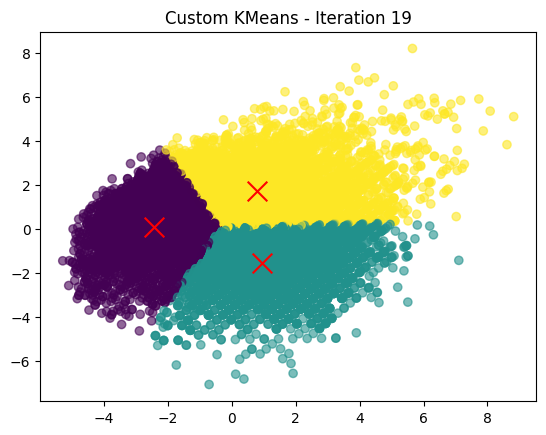

In [64]:
# Run Custom KMeans
optimal_k = 3  
custom_labels = custom_kmeans(data, optimal_k)  


In [65]:
# Scikit-Learn KMeans
kmeans = KMeans(n_clusters=optimal_k, random_state=0)  # Initialize scikit-learn KMeans
kmeans_labels = kmeans.fit_predict(data)  # Fit model and predict labels
kmeans_centroids = kmeans.cluster_centers_  # Get centroids

In [66]:
# Evaluate Silhouette Scores
custom_silhouette = silhouette_score(data, custom_labels)  
sklearn_silhouette = silhouette_score(data, kmeans_labels)  

print(f'Custom KMeans Silhouette Score: {custom_silhouette}')  
print(f'Scikit-Learn KMeans Silhouette Score: {sklearn_silhouette}')  


Custom KMeans Silhouette Score: 0.3503680484835989
Scikit-Learn KMeans Silhouette Score: 0.36106858278982445


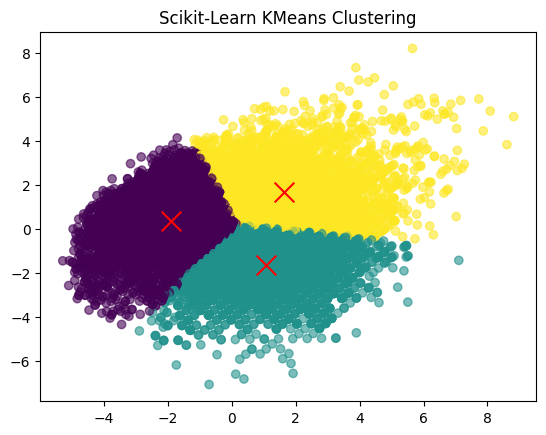

In [67]:
# Visualize Scikit-Learn KMeans
def plot_sklearn_clusters(data, labels, centroids, title):
    """
    Plot clusters and centroids from scikit-learn KMeans.
    """
    pca = PCA(n_components=2) 
    data_2d = pca.fit_transform(data.to_numpy())  
    centroids_2d = pca.transform(centroids) 
    plt.title(title)  # Set plot title
    plt.scatter(x=data_2d[:, 0], y=data_2d[:, 1], c=labels, cmap='viridis', alpha=0.6)  
    plt.scatter(x=centroids_2d[:, 0], y=centroids_2d[:, 1], s=200, c='red', marker='x')  
    plt.show()  # Display the plot

plot_sklearn_clusters(data, kmeans_labels, kmeans_centroids, 'Scikit-Learn KMeans Clustering') 

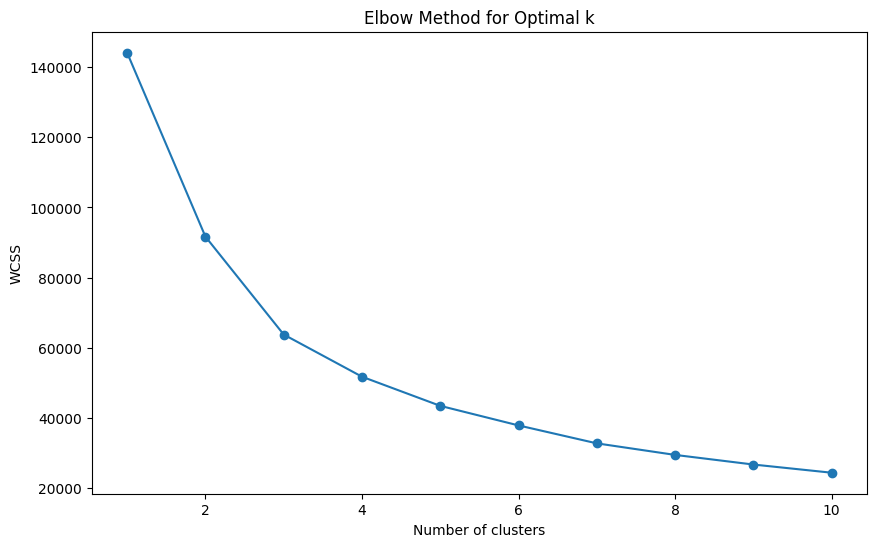

In [68]:
# Elbow Method
def elbow_method(data, max_k=10):
    wcss = []
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)
    
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_k + 1), wcss, marker='o')
    plt.title('Elbow Method for Optimal k')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()


elbow_method(data)